In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [4]:
train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [7]:
cols=['BedroomAbvGr','GrLivArea','FullBath','HalfBath','SalePrice']
train_df=train_df[cols]
test_df=test_df[cols[:-1]]

In [8]:
train_df.head(5)

,BedroomAbvGr,GrLivArea,FullBath,HalfBath,SalePrice
0,3,1710,2,1,208500
1,3,1262,2,0,181500
2,3,1786,2,1,223500
3,3,1717,1,0,140000
4,4,2198,2,1,250000


In [9]:
train_df.describe()

,BedroomAbvGr,GrLivArea,FullBath,HalfBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,1515.463699,1.565068,0.382877,180921.195890
std,0.815778,525.480383,0.550916,0.502885,79442.502883
min,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,2.000000,1129.500000,1.000000,0.000000,129975.000000
50%,3.000000,1464.000000,2.000000,0.000000,163000.000000
75%,3.000000,1776.750000,2.000000,1.000000,214000.000000
max,8.000000,5642.000000,3.000000,2.000000,755000.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [11]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

BedroomAbvGr    0
GrLivArea       0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64
BedroomAbvGr    0
GrLivArea       0
FullBath        0
HalfBath        0
dtype: int64


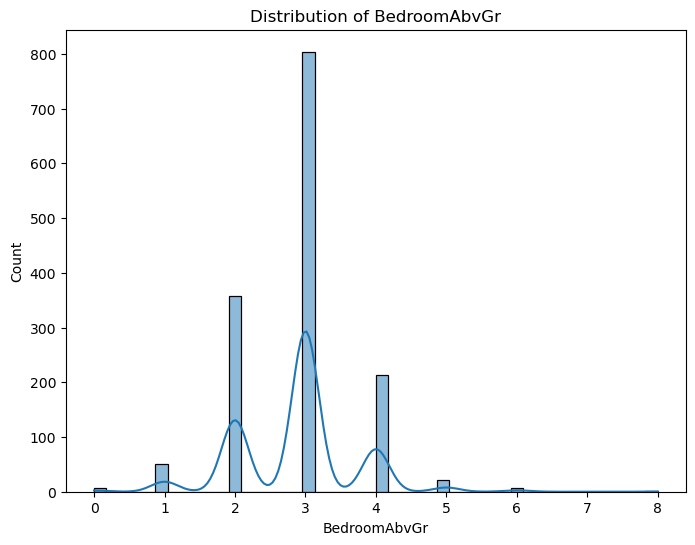

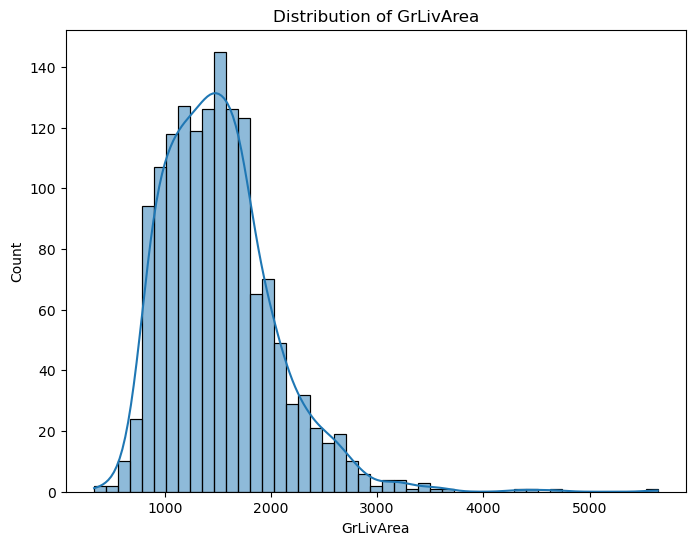

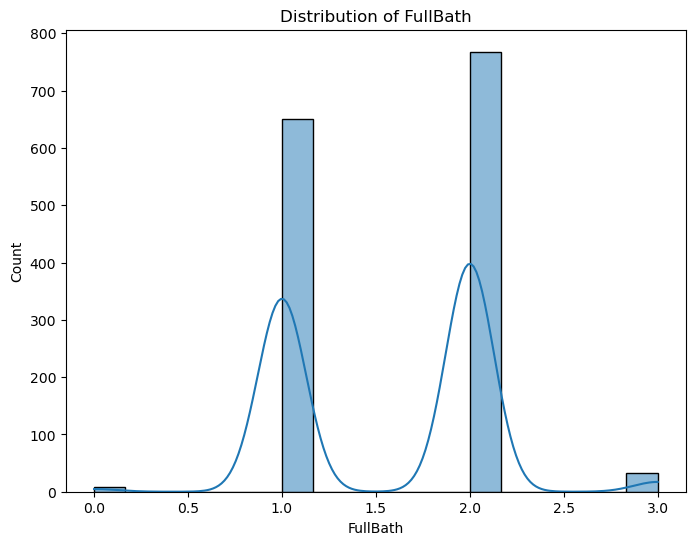

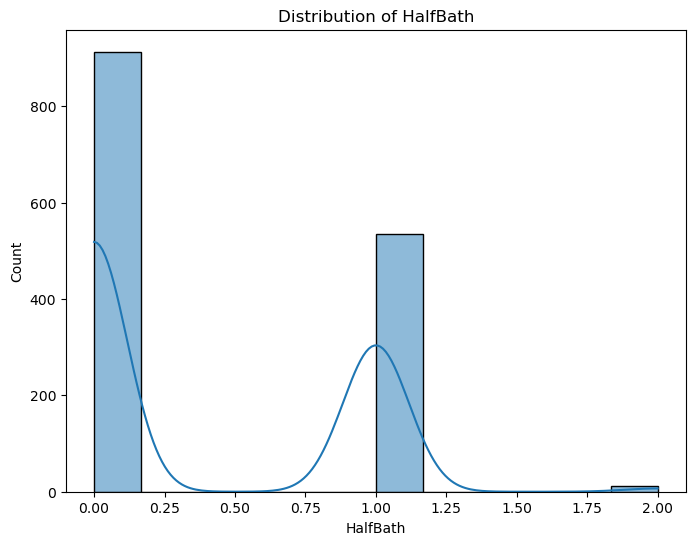

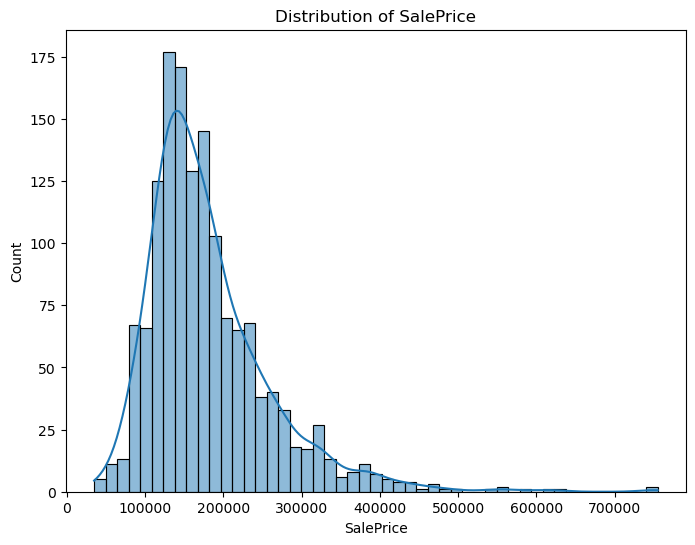

In [12]:
for col in train_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

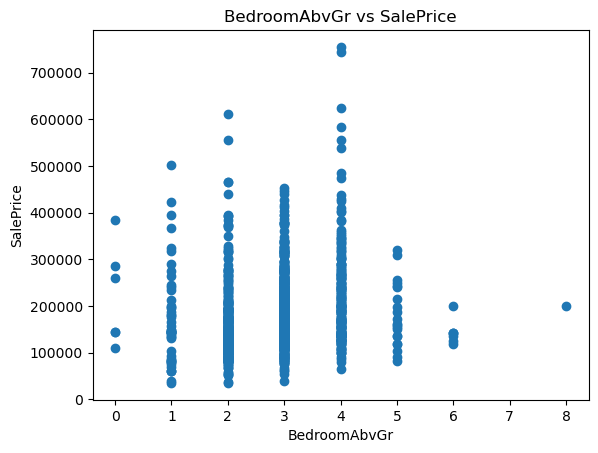

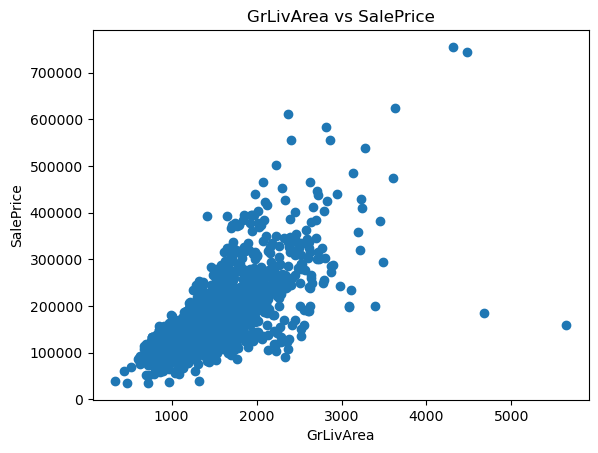

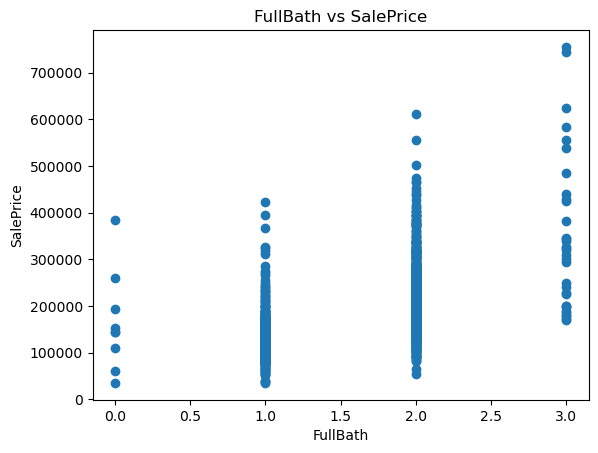

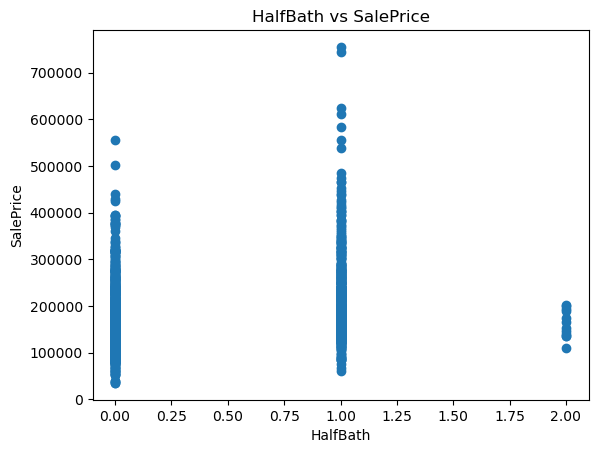

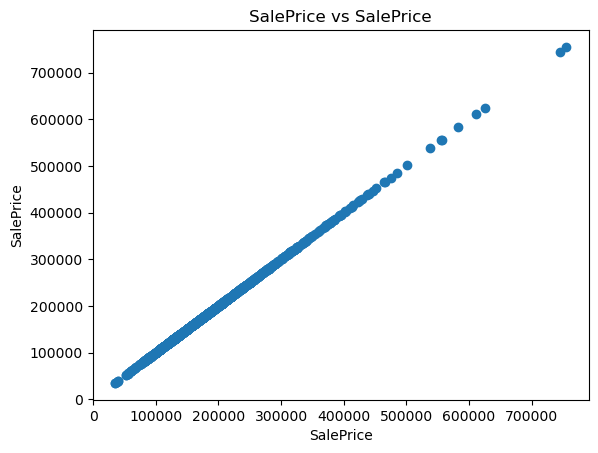

In [13]:
for col in cols:
  plt.scatter(train_df[col],train_df['SalePrice'])
  plt.title(f'{col} vs SalePrice')
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.show()

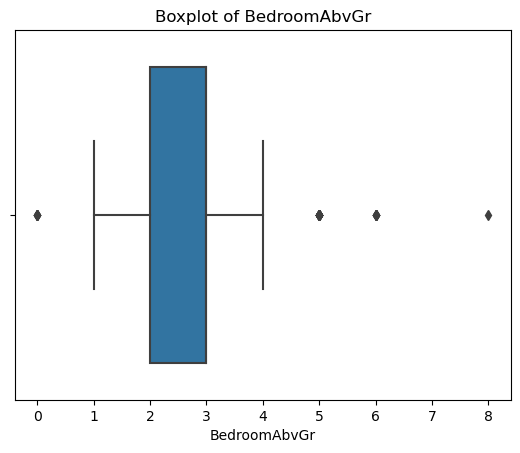

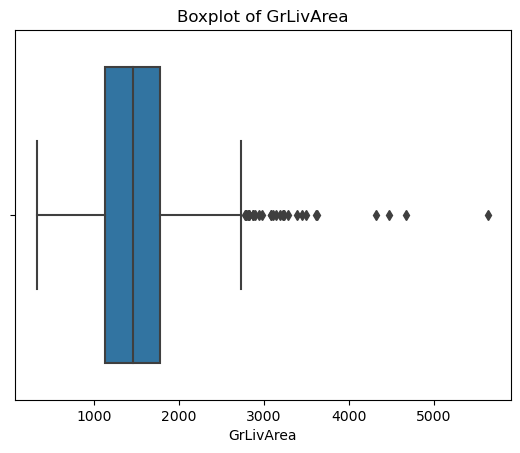

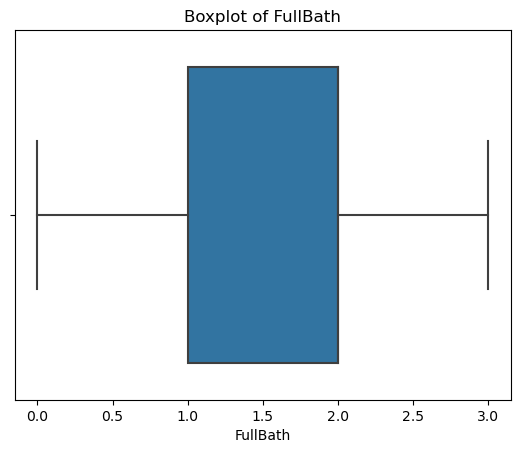

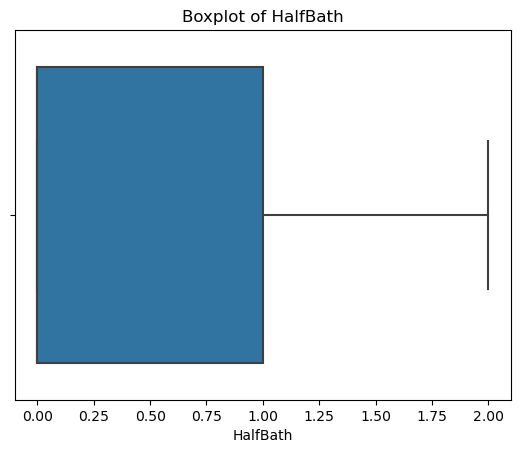

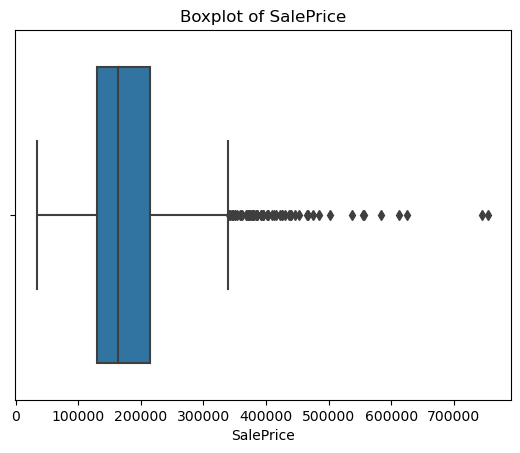

In [14]:
for co in cols:
  sns.boxplot(x=train_df[co])
  plt.title(f'Boxplot of {co}')
  plt.show()

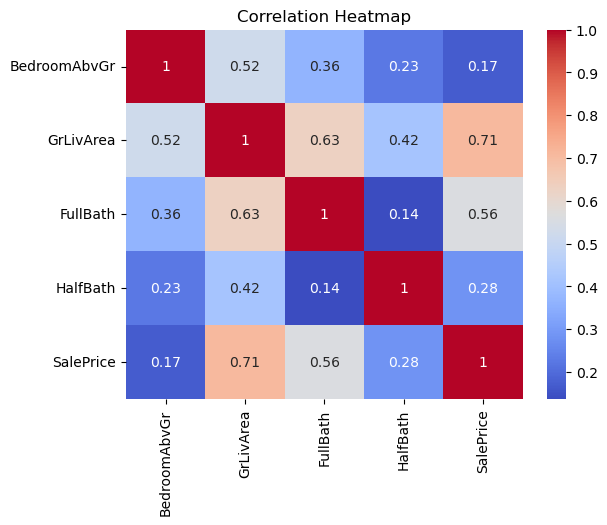

In [15]:
sns.heatmap(train_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X=train_df.drop('SalePrice',axis=1)
y=train_df['SalePrice']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_polynomial=PolynomialFeatures(degree=3)
X_train_poly=X_polynomial.fit_transform(X_train_scaled)
X_test_poly=X_polynomial.transform(X_test_scaled)
model=LinearRegression()
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)

In [ ]:
print('R2 Score:',r2_score(y_test,y_pred))
print("rmsle: ",np.sqrt(mean_squared_log_error(y_test,y_pred)))

R2 Score: 0.7265520176367135
rmsle:  0.24216997632669357


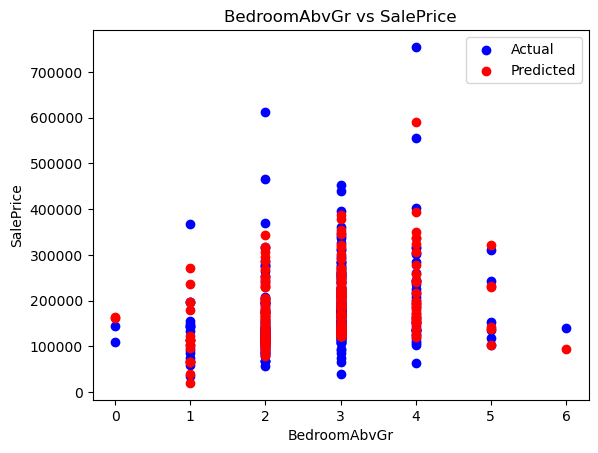

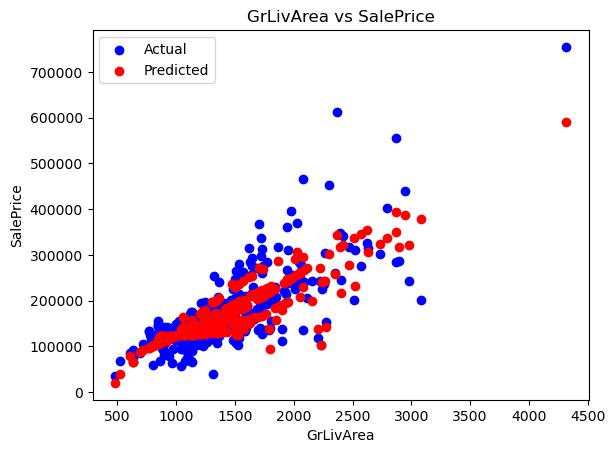

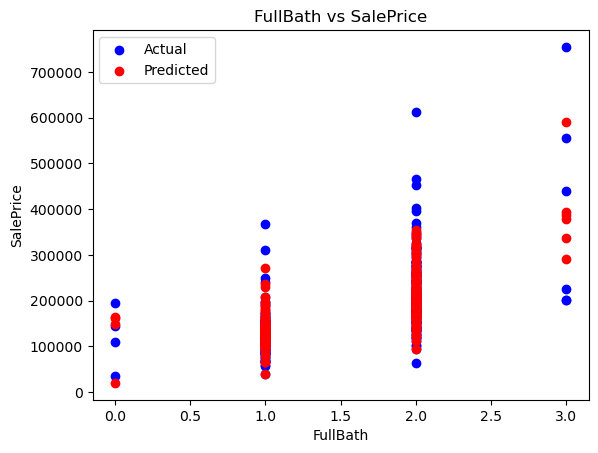

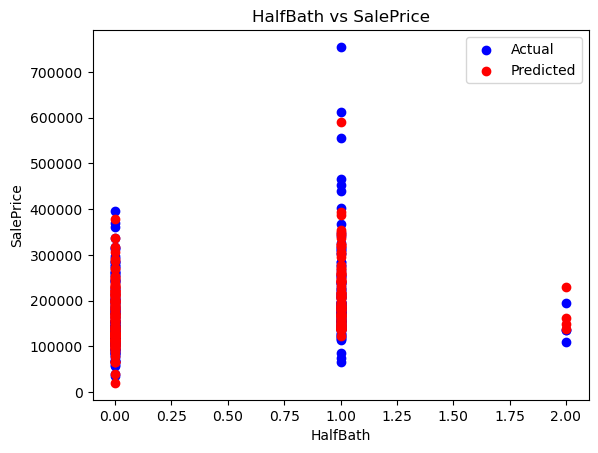

In [20]:
for col in cols[:-1]:
  plt.scatter(X_test[col],y_test,color='blue',label='Actual')
  plt.scatter(X_test[col],y_pred,color='red',label='Predicted')
  plt.title(f'{col} vs SalePrice')
  plt.xlabel(col)
  plt.ylabel('SalePrice')
  plt.legend()
  plt.show()